In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

params = {#'backend': 'pdf',
          'axes.labelsize': 16,
          # 'textfontsize': 12,
          'font.size' : 16,
          'font.serif' : 'Computer Modern', # 'Times',
          'legend.fontsize': 16,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': True,
          'figure.figsize': [6,6]
          }

#py.rcParams.update(params)
plt.rcParams.update(params)

In [2]:
import os
# import shutil

In [ ]:

# template_dir_rel_path = "OF-2412/qualitativeModel_convergence_test"
# template_dir = os.path.basename(template_dir_rel_path)

# # Get absolute paths
# template_abs = os.path.abspath(template_dir_rel_path)
# parent_dir = os.path.dirname(template_abs)


OF_case_dir_base = "qualitativeModel_convergence_test"
final_time = "50"
postProcessing_file_name = "sampleAlongLine"

cellNum     = [2**k for k in range(1, 13, 1)]
time_steps  = [0.25 / 2**k for k in range(len(cellNum))]

data_all_solutions = []

OF_case_dir = OF_case_dir_base + "_" + str(cellNum[-1])
solution_file  = os.path.join(OF_case_dir, "postProcessing", postProcessing_file_name, final_time, "line.xy")
reference_solution = np.loadtxt(solution_file)

xref, Tref, Uref, Yref = reference_solution[:, 0], reference_solution[:, 1], reference_solution[:, 2], reference_solution[:, 3]

errors_max  = np.zeros((len(cellNum)-1, 3))
errors_1    = np.zeros((len(cellNum)-1, 3))
errors_2    = np.zeros((len(cellNum)-1, 3))

h_arr       = np.zeros(len(cellNum)-1)

def compute_norm(ref_sol, approx_sol, ord):
    return np.linalg.norm(ref_sol - approx_sol, ord=ord) / np.linalg.norm(ref_sol, ord=ord)

for i in range(len(cellNum)-1):
    
    OF_case_dir = OF_case_dir_base + "_" + str(cellNum[i])
    
    solution_file  = os.path.join(OF_case_dir, "postProcessing", postProcessing_file_name, final_time, "line_T_U_Y.xy")
    data = np.loadtxt(solution_file)
    
    # data_all_solutions.append(data)

    x, T, U, Y = data[:, 0], data[:, 1], data[:, 2], data[:, 3]
    # h = x[1] - x[0]
    h_arr[i] = x[1] - x[0]

    ind_mask = [k for k in range(0, len(xref)+1, cellNum[-1]//cellNum[i])]  # mask for the reference solution indices
    
    T_error_max = compute_norm(Tref[ind_mask], T, ord=np.inf)
    T_error_1   = compute_norm(Tref[ind_mask], T, ord=1)
    T_error_2   = compute_norm(Tref[ind_mask], T, ord=2)

    U_error_max = compute_norm(Uref[ind_mask], U, ord=np.inf)
    U_error_1   = compute_norm(Uref[ind_mask], U, ord=1)
    U_error_2   = compute_norm(Uref[ind_mask], U, ord=2)

    Y_error_max = compute_norm(Yref[ind_mask], Y, ord=np.inf)
    Y_error_1   = compute_norm(Yref[ind_mask], Y, ord=1)
    Y_error_2   = compute_norm(Yref[ind_mask], Y, ord=2)
    
    # errors_max.append([T_error_max, U_error_max, Y_error_max])
    # errors_1.append([T_error_1, U_error_1, Y_error_1])
    # errors_2.append([T_error_2, U_error_2, Y_error_2])

    errors_max[i, :] = np.array([T_error_max, U_error_max, Y_error_max])
    errors_1[i, :]   = np.array([T_error_1, U_error_1, Y_error_1])
    errors_2[i, :]   = np.array([T_error_2, U_error_2, Y_error_2])

    # print(T_error_max)

    

In [4]:
# len([k for k in range(0, len(xref)+1, cellNum[-1]//cellNum[0])])
# len([k for k in range(0, len(xref)+1, cellNum[-1]//cellNum[0])])

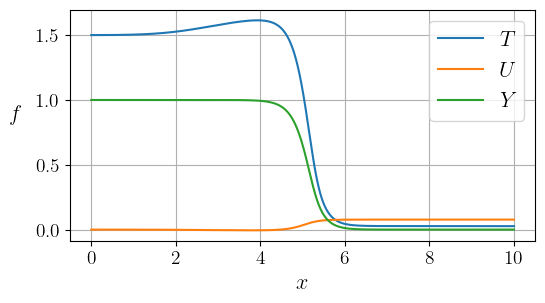

In [5]:
fig,(ax) = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))

ax.plot(xref, Tref, label=r'$T$') # label=r'$\mathrm{const}\ $' + r'$\sqrt{\delta}$') 
ax.plot(xref, Uref, label=r'$U$') # label=r'$\mathrm{const}\ $' + r'$\sqrt{\delta}$') 
ax.plot(xref, Yref, label=r'$Y$') # label=r'$\mathrm{const}\ $' + r'$\sqrt{\delta}$') 

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f$', rotation=0, labelpad=15)

ax.grid(True)
ax.legend()

# plt.savefig("/Users/shamilmagomedov/Desktop/T_boundary_condition.pdf", bbox_inches='tight')

plt.show()

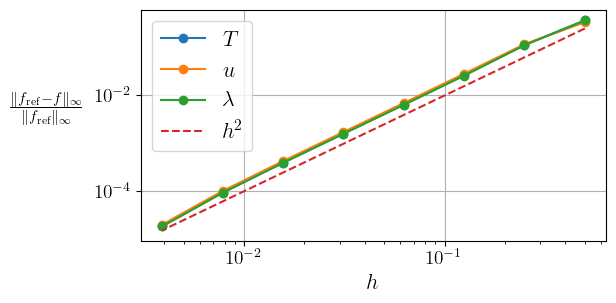

In [6]:
fig,(ax) = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))

ax.plot(h_arr, errors_max[:, 0], label=r'$T$', marker='o')
ax.plot(h_arr, errors_max[:, 1], label=r'$u$', marker='o')
ax.plot(h_arr, errors_max[:, 2], label=r'$\lambda$', marker='o')
ax.plot(h_arr, h_arr**2, label=r'$h^2$', ls="dashed")

ax.set_xlabel(r'$h$')
ax.set_ylabel(r'$\frac{\| f_{\mathrm{ref}} - f \|_{\infty}}{\| f_{\mathrm{ref}} \|_{\infty}}$', rotation=0, labelpad=35)

ax.grid(True)
ax.legend()

ax.set_xscale('log')
ax.set_yscale('log')

# plt.savefig("/Users/shamilmagomedov/Desktop/T_boundary_condition.pdf", bbox_inches='tight')
# plt.savefig("convergence_rate_inf.pdf", bbox_inches='tight')

plt.show()

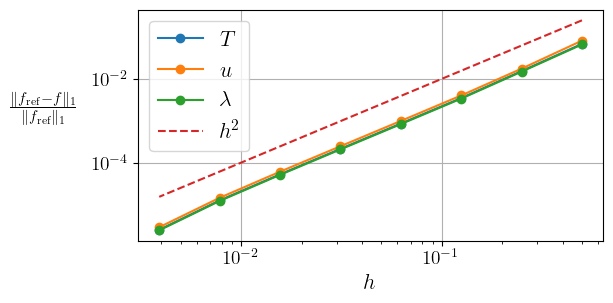

In [7]:
fig,(ax) = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))

ax.plot(h_arr, errors_1[:, 0], label=r'$T$', marker='o')
ax.plot(h_arr, errors_1[:, 1], label=r'$u$', marker='o')
ax.plot(h_arr, errors_1[:, 2], label=r'$\lambda$', marker='o')
ax.plot(h_arr, h_arr**2, label=r'$h^2$', ls="dashed")

ax.set_xlabel(r'$h$')
ax.set_ylabel(r'$\frac{\| f_{\mathrm{ref}} - f \|_{1}}{\| f_{\mathrm{ref}} \|_{1}}$', rotation=0, labelpad=35)

ax.grid(True)
ax.legend()

ax.set_xscale('log')
ax.set_yscale('log')

# plt.savefig("/Users/shamilmagomedov/Desktop/T_boundary_condition.pdf", bbox_inches='tight')
# plt.savefig("convergence_rate_1.pdf", bbox_inches='tight')

plt.show()

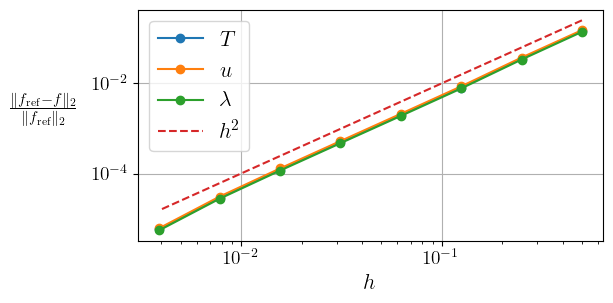

In [8]:
fig,(ax) = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))

ax.plot(h_arr, errors_2[:, 0], label=r'$T$', marker='o')
ax.plot(h_arr, errors_2[:, 1], label=r'$u$', marker='o')
ax.plot(h_arr, errors_2[:, 2], label=r'$\lambda$', marker='o')
ax.plot(h_arr, h_arr**2, label=r'$h^2$', ls="dashed")

ax.set_xlabel(r'$h$')
ax.set_ylabel(r'$\frac{\| f_{\mathrm{ref}} - f \|_{2}}{\| f_{\mathrm{ref}} \|_{2}}$', rotation=0, labelpad=35)

ax.grid(True)
ax.legend()

ax.set_xscale('log')
ax.set_yscale('log')

# plt.savefig("/Users/shamilmagomedov/Desktop/T_boundary_condition.pdf", bbox_inches='tight')
# plt.savefig("convergence_rate_2.pdf", bbox_inches='tight')

plt.show()

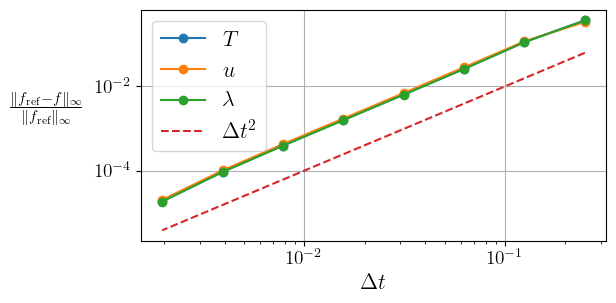

In [9]:
fig,(ax) = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))

ax.plot(time_steps[0:len(time_steps)-1], errors_max[:, 0], label=r'$T$', marker='o')
ax.plot(time_steps[0:len(time_steps)-1], errors_max[:, 1], label=r'$u$', marker='o')
ax.plot(time_steps[0:len(time_steps)-1], errors_max[:, 2], label=r'$\lambda$', marker='o')
ax.plot(time_steps[0:len(time_steps)-1], [t**2 for t in time_steps[0:len(time_steps)-1]], label=r'$\Delta t^2$', ls="dashed")

ax.set_xlabel(r'$\Delta t$')
ax.set_ylabel(r'$\frac{\| f_{\mathrm{ref}} - f \|_{\infty}}{\| f_{\mathrm{ref}} \|_{\infty}}$', rotation=0, labelpad=35)

ax.grid(True)
ax.legend()

ax.set_xscale('log')
ax.set_yscale('log')

# plt.savefig("/Users/shamilmagomedov/Desktop/T_boundary_condition.pdf", bbox_inches='tight')

plt.show()